In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("netflix_titles.csv") #make sure filename is exact
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape

(8807, 12)

In [9]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df.dropna(subset = ['date_added','rating','duration'])

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

C:\Users\yusuf\AppData\Local\Temp\ipykernel_61708\44827034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')


In [18]:
df['date_added'].isnull().sum()

np.int64(88)

In [19]:
df = df.dropna(subset=['date_added'])

In [20]:
df['date_added'].isnull().sum()

np.int64(0)

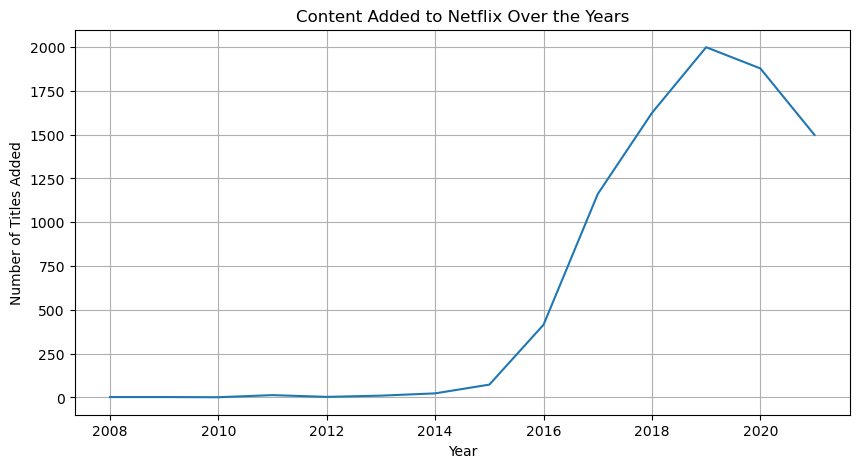

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count how many shows/movies added per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

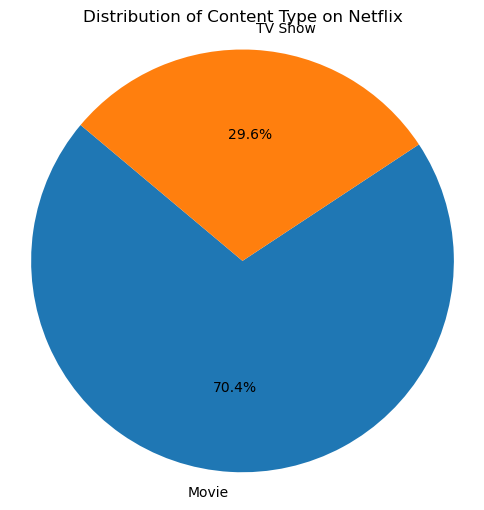

In [22]:
# Count of each type
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Content Type on Netflix")
plt.axis('equal')  # To make it a circle
plt.show()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_61708\999633172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['country'] = df_countries['country'].apply(lambda x: x.split(',')[0].strip())
C:\Users\yusuf\AppData\Local\Temp\ipykernel_61708\999633172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


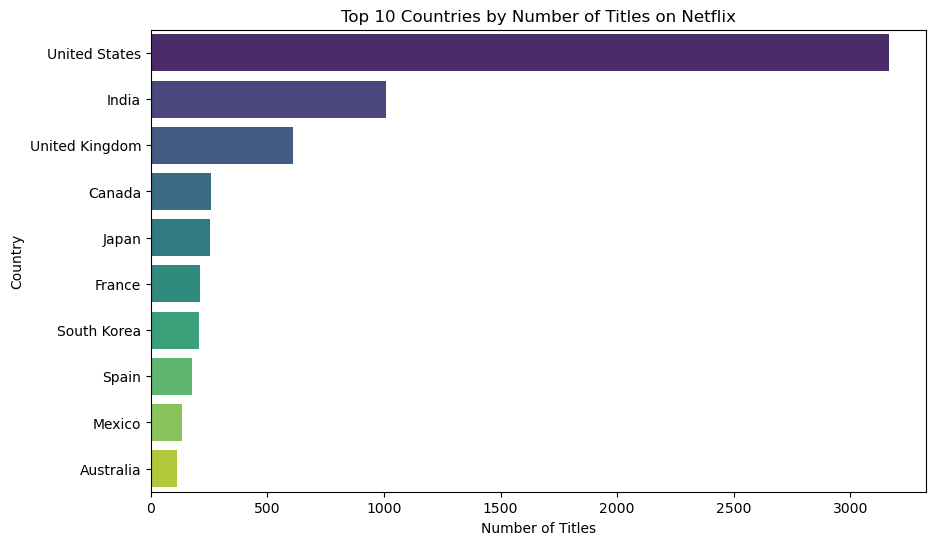

In [23]:
# Split countries (some rows have multiple countries separated by commas)
df_countries = df.dropna(subset=['country'])
df_countries['country'] = df_countries['country'].apply(lambda x: x.split(',')[0].strip())

# Count top 10 countries
top_countries = df_countries['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

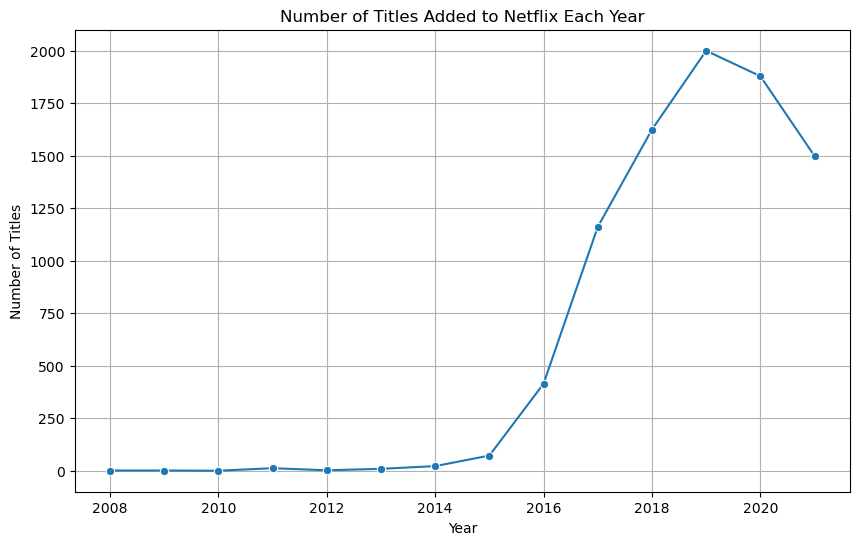

In [24]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count number of titles added per year
content_by_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()